# Zeeshan Ali (01-134212-197)
# DIP LAB Journal 7

# Task 1 (Gray Level Slicing)

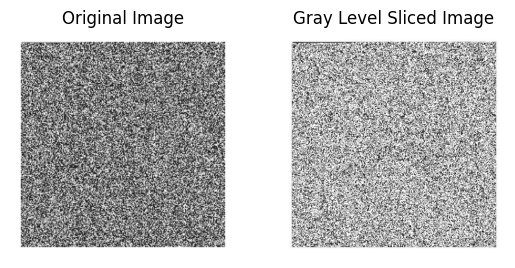

In [37]:
# Load the image in grayscale
img1 = cv2.imread("image1.jpg", cv2.IMREAD_GRAYSCALE)
# Alternatively, we could use cv2.COLOR_BGR2GRAY in cv2.imread if the image is in color.

# Normalize the pixel values to the range [0, 1]
normalize = img1 / 255.0

# Create an empty array for the sliced image
sliced = np.zeros_like(normalize)

# Iterate through each pixel and apply gray level slicing
for i in range(normalize.shape[0]):
    for j in range(normalize.shape[1]):
        value = normalize[i, j]
        if value <= 0.25:
            sliced[i, j] = 1 - value  # Invert values below 0.25
        elif value <= 0.5:
            sliced[i, j] = 1  # Set to 1 for values between 0.25 and 0.5
        else:
            sliced[i, j] = value  # Keep the original normalized value

# Scale the sliced image back to the range [0, 255] and convert to uint8
sliced = (sliced * 255).astype(np.uint8)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the gray level sliced image
plt.subplot(1, 2, 2)
plt.imshow(sliced, cmap='gray')
plt.title("Gray Level Sliced Image")
plt.axis('off')

plt.show()

# Task 2 (Histogram Equalization)

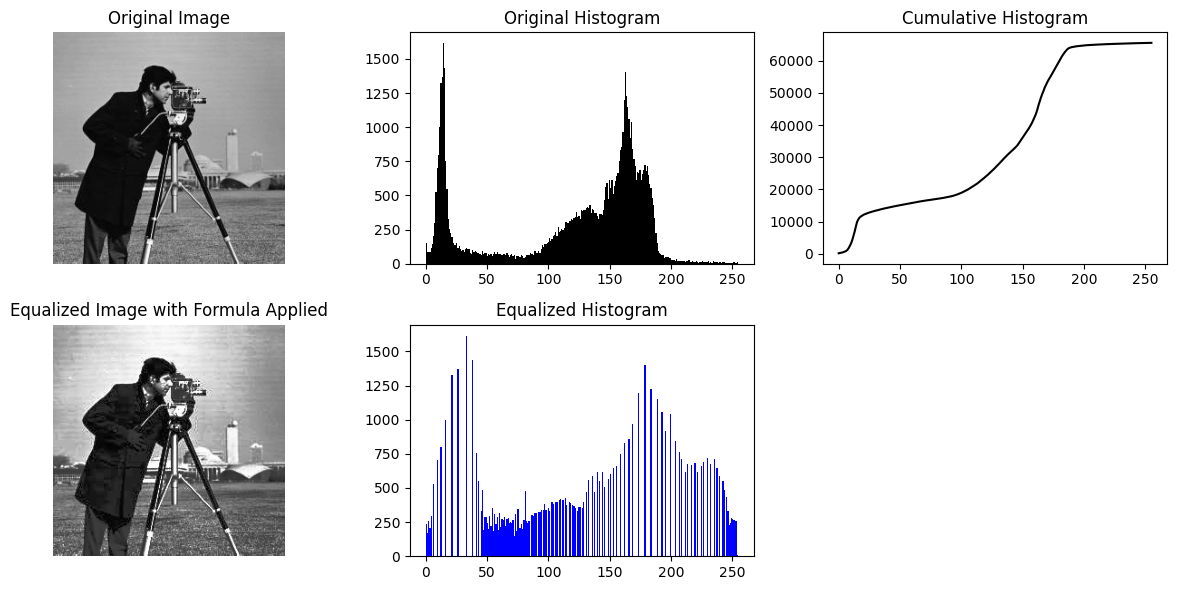

In [40]:
def myhist_equ(image):
    r, c = image.shape  # Number of rows and columns
    
    # Step 1: Calculate the histogram
    h = np.zeros(256, dtype=int)
    for i in range(r):
        for j in range(c):
            h[image[i, j]] += 1
    
    # Step 2: Calculate cumulative histogram
    cum_h = np.zeros(256, dtype=float)
    cum_h[0] = h[0]
    for k in range(1, 256):
        cum_h[k] = cum_h[k - 1] + h[k]
    
    # Step 3: Normalize each pixel in out_image using the formula
    out_image = np.zeros((r,c), dtype=float)  # Initialize as float for accurate division
    for i in range(r):
        for j in range(c):
            # Apply the provided formula
            out_image[i, j] = cum_h[image[i, j]] / (r * c)
    
    # Scale back to the range [0, 255] and convert to uint8 for display
    out_image = (out_image * 255).astype(np.uint8)

    # Display results
    plt.figure(figsize=(12, 6))
    
    # Original Image
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Original Histogram
    plt.subplot(2, 3, 2)
    plt.hist(image.flatten(), bins=256, range=[0, 255], color='black')
    plt.title('Original Histogram')

    # Cumulative Histogram (as a line plot)
    plt.subplot(2, 3, 3)
    plt.plot(cum_h, color='black')
    plt.title('Cumulative Histogram')
    
    # Equalized Image
    plt.subplot(2, 3, 4)
    plt.imshow(out_image, cmap='gray')
    plt.title('Equalized Image with Formula Applied')
    plt.axis('off')
    
    # Equalized Histogram
    plt.subplot(2, 3, 5)
    plt.hist(out_image.flatten(), bins=256, range=[0, 255], color='blue')
    plt.title('Equalized Histogram')
    
    plt.tight_layout()
    plt.show()

# Load and apply histogram equalization to the image
image = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)
myhist_equ(image)

# Task 3 (Contrast Stretching)

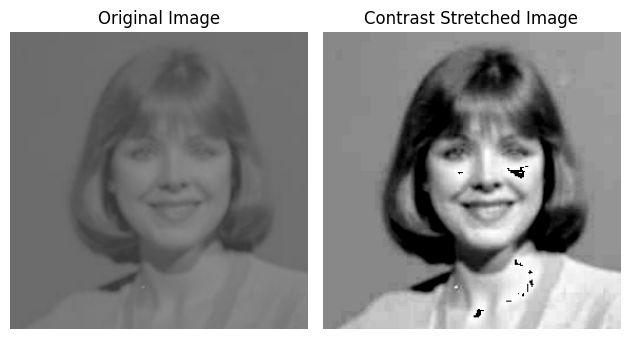

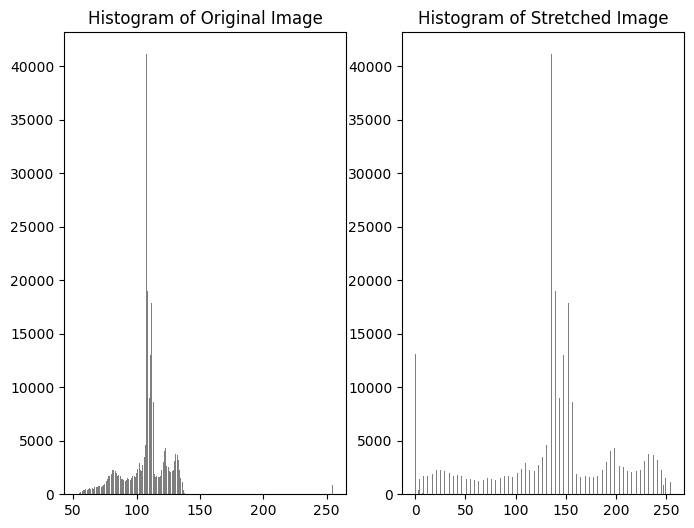

In [41]:
def contrastStretch(image):
    img_float = image.astype(np.float32) # Convert the image to a float32 format for more precise calculations

    # Manually set min and max values for contrast stretching
    min_val = np.percentile(img_float, 5)  # Lower bound (5th percentile)
    max_val = np.percentile(img_float, 99)  # Upper bound (99th percentile)

    # Apply contrast stretching transformation
    stretched_image = (255 * (img_float - min_val) / (max_val - min_val)).astype(np.uint8)

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(stretched_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Contrast Stretched Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))

    plt.subplot(1, 2, 1)
    plt.hist(image.ravel(), bins=256, color='black', alpha=0.5)
    plt.title('Histogram of Original Image')

    plt.subplot(1, 2, 2)
    plt.hist(stretched_image.ravel(), bins=256, color='black', alpha=0.5)
    plt.title('Histogram of Stretched Image')

    plt.show()

img = cv2.imread('image3.png')
contrastStretch(img)